# Project 12: Explanatory Data Analysis Challenge (Olympic Games)

## Data Import and Inspection

Import the Datasets Summer (__summer.csv__), Winter (__winter.csv__) and dictionary (__dictionary.csv__) and Inspect! 

In [ ]:
import pandas as pd

In [ ]:
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dic = pd.read_csv("dictionary.csv")

In [ ]:
summer

In [ ]:
summer.info()

In [ ]:
winter

In [ ]:
winter.info()

In [ ]:
dic

In [ ]:
dic.info()

In [ ]:
dic[dic.isnull().any(axis = 1)]

## Merging and Concatenating

1. __Merge__ Summer and Winter (one row for each Medal awarded in any Olympic Games) and save the merged DataFrame in __olympics__. 
2. An __additional column__ (e.g. "Edition") shall indicate the Edition -> __Summer or Winter__.
3. Add the __full Country name__ from dictionary to olympics (e.g. France for FRA).

In [ ]:
pd.concat([summer, winter], axis = 0, keys = ["Summer", "Winter"],
          names = ["Edition"]).reset_index().drop(columns = "level_1")

In [ ]:
olympics = pd.concat([summer, winter], axis = 0, keys = ["Summer", "Winter"],
                     names = ["Edition"]).reset_index().drop(columns = "level_1")

In [ ]:
olympics

In [ ]:
dic.head()

In [ ]:
olympics.merge(dic.iloc[:, :2], how = "left", 
               left_on = "Country", right_on = "Code").drop(columns = ["Code"])

In [ ]:
olympics = olympics.merge(dic.iloc[:, :2], how = "left", 
                          left_on = "Country", right_on = "Code").drop(columns = ["Code"])

In [ ]:
olympics.info()

In [ ]:
olympics.reset_index(drop = True, inplace = True)

In [ ]:
olympics

## Data Cleaning (Part 1)

1. If you haven´t done it yet: Assign appropriate __Column Headers__ to Country Codes (e.g. __"Code"__) and full Country Names (e.g. __"Country"__).
2. __Remove Spaces__ from column headers in olympics and dictionary.
3. For some Country Codes, there is no corresponding __full Country Name__ available (e.g. for "URS") -> __missing values__ in olympics. Identify these Country Codes and search the Web for the full Country Names. __Replace__ missing values! (Alternatively, you can find a Solution for this at the end of this Notebook!) 

In [ ]:
olympics

In [ ]:
olympics.rename(columns = {"Country_x":"Code", "Country_y": "Country"}, inplace = True)

In [ ]:
dic

In [ ]:
dic.rename(columns = {"GDP per Capita":"GDP"}, inplace= True)

In [ ]:
olympics.info()

In [ ]:
olympics.loc[olympics.Country.isnull()]

In [ ]:
missing_C_index = olympics.loc[olympics.Country.isnull()].index
missing_C_index

In [ ]:
olympics.loc[olympics.Country.isnull()].Code.value_counts()

In [ ]:
old_c = olympics.loc[olympics.Country.isnull(), :].Code.value_counts().index
old_c

In [ ]:
mapper = pd.Series(index=old_c, name = "Country", data = ["Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia",
                               "Yugoslavia", "Unified Team", "Unified Team of Germany", "Mixed teams", "Serbia",
                              "Australasia", "Russian Empire", "Montenegro", "Trinidad and Tobago", "Bohemia", 
                              "West Indies Federation", "Singapore", "Independent Olympic Participants"])

In [ ]:
mapper

In [ ]:
olympics.loc[missing_C_index, "Code"].map(mapper)

In [ ]:
olympics.Country.fillna(olympics.Code.map(mapper), inplace = True)

In [ ]:
olympics.loc[missing_C_index]

## Data Cleaning (Part 2)

1. __Remove rows__ from olympics where the Country code is unknown. (Make sure you reset the Index -> RangeIndex)
2. Convert the column __Medal__ into an __ordered Categorical__ column ("Bronze" < "Silver" < "Gold")

In [ ]:
olympics.info()

In [ ]:
olympics[olympics.Code.isna()]

In [ ]:
olympics.dropna(subset = ["Code"], inplace = True)

In [ ]:
olympics.info()

In [ ]:
olympics.reset_index(drop = True, inplace = True)

In [ ]:
olympics.nunique()

In [ ]:
olympics.Medal = olympics.Medal.astype("category")

In [ ]:
olympics.info()

In [ ]:
olympics.Medal.sort_values()

In [ ]:
olympics.Medal.cat.set_categories(["Bronze", "Silver", "Gold"], ordered = True, inplace = True)

In [ ]:
olympics.Medal.sort_values()

## What are the most successful countries of all times?

For the next questions, use Seaborn plots.
1. What are the __Top 10__ Countries by __total medals__?
2. __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
3. __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
olympics

In [ ]:
olympics.Country.value_counts()

In [ ]:
top_10 = olympics.Country.value_counts().head(10)
top_10

In [ ]:
top_10.plot(kind = "bar", fontsize = 15, figsize=(12,8))
plt.title("Top 10 Countries by Medals", fontsize = 15)
plt.ylabel("Medals", fontsize = 14)
plt.show()

In [ ]:
olympics_10 = olympics[olympics.Country.isin(top_10.index)]
olympics_10

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Country", order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Country", hue = "Edition", order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Edition", hue = "Country", hue_order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Country", hue = "Medal", order = top_10.index,
              hue_order = ["Gold", "Silver", "Bronze"], palette = ["gold", "silver", "brown"])
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Medal", hue = "Country", 
              order = ["Gold", "Silver", "Bronze"], hue_order= top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

## Do GDP, Population and Politics matter?

1. Create the following __aggregated and merged__ DataFrame with __Top 50 Countries__ (you can see an excerpt with the first 12 Countries). The Column __Total_Games__ shows the __number of Participations__ (as an approximation: determine the number of Editions where Countries have won at least one medal).

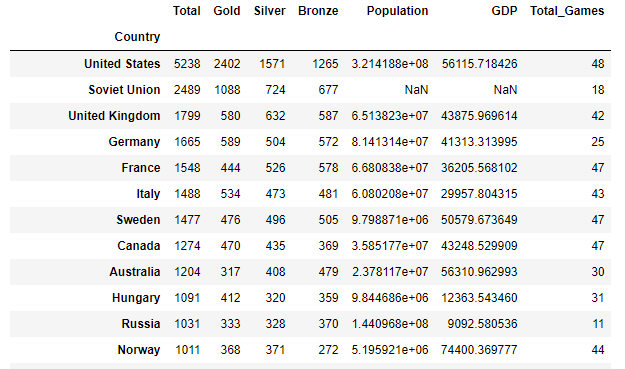

2. __Convert__ the __absolute values__ in the DataFrame into __ranks__ and save the ranks DataFrame in new variable (see screenshot). Ranks are more meaningful than absolute numbers.

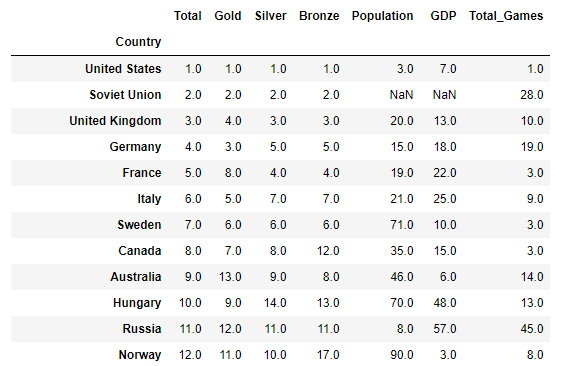

In [ ]:
olympics

In [ ]:
medals_per_country = pd.crosstab(index = olympics.Country, columns = olympics.Medal, 
                                 margins = True, margins_name= "Total")
medals_per_country

In [ ]:
medals_per_country.drop("Total", axis = 0, inplace = True)

In [ ]:
medals_per_country

In [ ]:
medals_per_country = medals_per_country[["Total", "Gold", "Silver", "Bronze"]].sort_values(by = ["Total", "Gold", "Silver", "Bronze"], ascending = False)

In [ ]:
medals_per_country.head(50)

In [ ]:
dic

In [ ]:
medals_per_country = medals_per_country.merge(dic, how = "left", left_index = True, 
                                              right_on = "Country").drop(columns = ["Code"]).set_index("Country")

In [ ]:
medals_per_country

In [ ]:
olympics.nunique()

In [ ]:
olympics["Games"] = olympics.apply(lambda x: str(x.Year) + " " + x.City, axis = 1)

In [ ]:
olympics

In [ ]:
olympics.Games.nunique()

In [ ]:
olympics.Games.value_counts()

In [ ]:
olympics.groupby("Country").apply(lambda x: x.Games.nunique())

In [ ]:
medals_per_country["Total_Games"] = olympics.groupby("Country").apply(lambda x: x.Games.nunique())

In [ ]:
medals_per_country.head(50)

In [ ]:
medals_per_country.rank(ascending = False).head(50)

## Statistical Analysis and Hypothesis Testing with scipy

In the follwing work with __Ranks__!
Check whether __GDP__ (Standard of Living), __Total_Games__ (Political Stability measure) and __Population__ (Size) have an effect on __Total Medals__. (hint: work with spearman correlation, not with pearson correlation)

In [ ]:
medals_per_country

In [ ]:
medals_per_country.drop(columns = ["Gold", "Silver", "Bronze"], inplace = True)

In [ ]:
medals_per_country.corr(method = "pearson")

In [ ]:
medals_per_country.corr(method = "spearman")

In [ ]:
medals_per_country.rank(ascending = False).corr(method = "pearson")

In [ ]:
import scipy.stats as stats

------------------------

__Hypothesis 1: There is no relationship between Total Medals and Population__

In [ ]:
stats.spearmanr(medals_per_country.Total, medals_per_country.Population, 
                             nan_policy = "omit")

In [ ]:
r, p_value = stats.spearmanr(medals_per_country.Total, medals_per_country.Population, 
                             nan_policy = "omit")

In [ ]:
r

In [ ]:
round(p_value)

__Reject Hypothesis 1 -> There is a significant (positive) relationship between Total Medals and Population__

--------------------------------

__Hypothesis 2: There is no relationship between Total Medals and GDP per Capita__

In [ ]:
r, p_value = stats.spearmanr(medals_per_country.Total, medals_per_country.GDP,
                             nan_policy = "omit")

In [ ]:
r

In [ ]:
p_value

__Reject Hypothesis 2 -> There is a significant (positive) relationship between Total Medals and GDP per Capita__

----------------------

__Hypothesis 3: There is no relationship between Total Medals and Participations__

In [ ]:
medals_per_country.head(50)

In [ ]:
r, p_value = stats.spearmanr(medals_per_country.head(50).Total, 
                             medals_per_country.head(50).Total_Games)

In [ ]:
r

In [ ]:
p_value

__Reject Hypothesis 3 -> There is a significant (positive) relationship between Total Medals and Participations__

## Aggregating and Ranking

Create the following __Seaborn Heatmap__ with __Medal Ranks__ for Top 50 Countries (Total Medals, Summer Games Medals, Winter Games Medals, Men, Women).

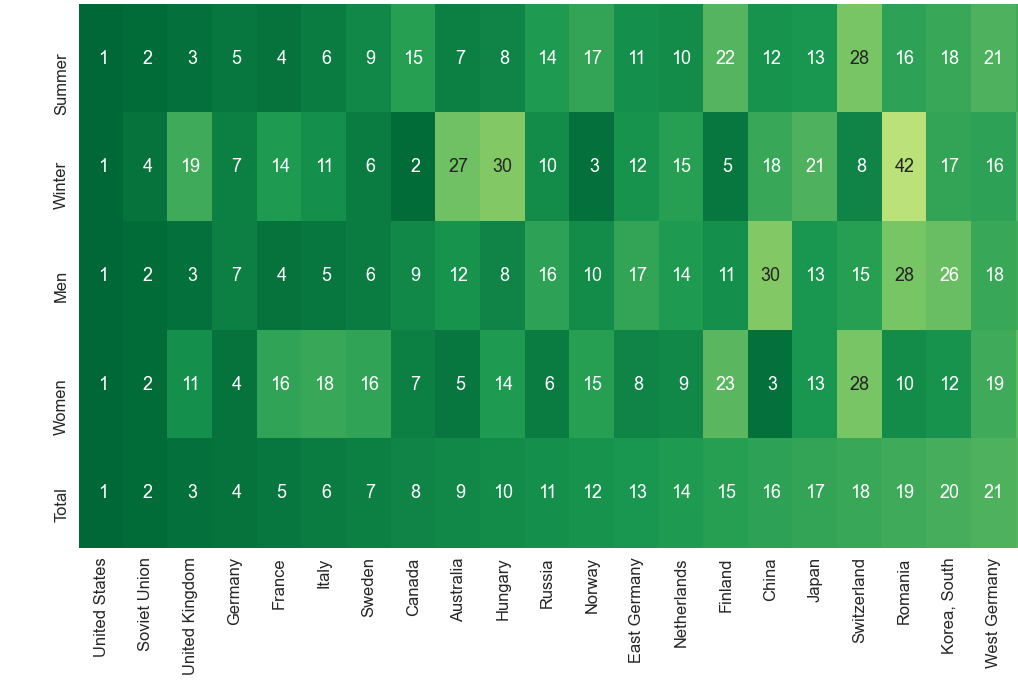

In [ ]:
olympics

In [ ]:
sum_vs_win = pd.crosstab(olympics.Country, olympics.Edition)

In [ ]:
sum_vs_win

In [ ]:
men_vs_women =  pd.crosstab(olympics.Country, olympics.Gender)
men_vs_women

In [ ]:
medals_by_cats = pd.concat([sum_vs_win, men_vs_women], axis = 1)
medals_by_cats 

In [ ]:
medals_by_cats["Total"] = medals_by_cats.Summer + medals_by_cats.Winter

In [ ]:
medals_by_cats

In [ ]:
medals_by_cats.sort_values("Total", ascending = False, inplace = True)

In [ ]:
medals_by_cats

In [ ]:
ranks = medals_by_cats.rank(ascending = False, method = "average")
ranks

In [ ]:
top_50 = ranks.head(50)

In [ ]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.T,cmap='RdYlGn_r',annot=True,fmt='2.0f')
plt.show()

## Summer Games vs. Winter Games - does Geographical Location matter?

__Identify Countries__ that are 
1. __equally successful__ in Summer and Winter Games
2. more successful in __Summer Games__
3. more successful in __Winter Games__


What could be the reasons?

In [ ]:
top_50.sort_values("Summer")

In [ ]:
top_50.sort_values("Winter")

In [ ]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.sort_values(by = "Summer").T,cmap='RdYlGn_r',annot=True,fmt='2.0f')
plt.show()

In [ ]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.sort_values(by = "Winter").T,cmap='RdYlGn_r',annot=True,fmt='2.0f')
plt.show()

In [ ]:
top_50.Summer.sub(top_50.Winter).sort_values()

In [ ]:
rank_diff = top_50.Summer.sub(top_50.Winter).sort_values().to_frame()
rank_diff

In [ ]:
plt.figure(figsize = (35, 5))
sns.heatmap(rank_diff.T,cmap='RdBu',annot=True,fmt='2.0f', center = 0)
plt.show()

## Men vs. Women - does Culture & Religion matter?

__Identify Countries__ where
1. Men and Women are __equally successful__
2. __Men__ are more successful
3. __Women__ are more successful

What could be the reasons?

In [ ]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.sort_values(by = "Men").T,cmap='RdYlGn_r',annot=True,fmt='2.0f')
plt.show()

In [ ]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.sort_values(by = "Women").T,cmap='RdYlGn_r',annot=True,fmt='2.0f')
plt.show()

In [ ]:
rank_diff2 = top_50.Men.sub(top_50.Women).sort_values().to_frame()
rank_diff2

In [ ]:
plt.figure(figsize = (35, 5))
sns.heatmap(rank_diff2.T,cmap='RdBu_r',annot=True,fmt='2.0f', center = 0)
plt.show()

## Do Traditions matter?

Create the following __Seaborn Heatmap__ that shows the __Ranks__ of Top 50 Countries __by Sports__. <br>
Identify traditional Sports / National Sports for e.g. UK and China!

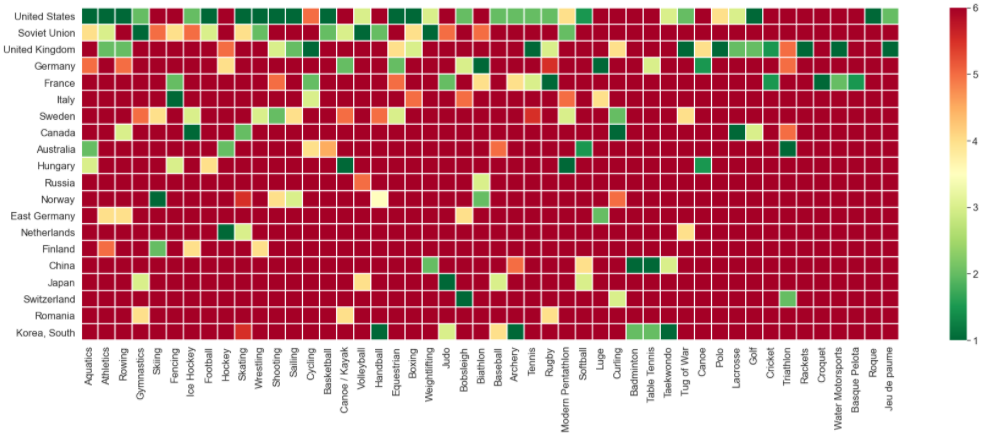

In [ ]:
olympics

In [ ]:
olympics.Sport.value_counts()

In [ ]:
sports = olympics.Sport.value_counts().index
sports

In [ ]:
olympics.Country.value_counts().head(20)

In [ ]:
top_20 = olympics.Country.value_counts().head(20).index
top_20

In [ ]:
by_sport = pd.crosstab(olympics.Country, olympics.Sport)
by_sport

In [ ]:
by_sport = by_sport.rank(ascending = False, method = "average")
by_sport

In [ ]:
by_sport = by_sport.loc[top_20, sports].copy()
by_sport

In [ ]:
plt.figure(figsize = (30, 10))
sns.heatmap(by_sport,cmap='RdYlGn_r', vmin = 1, vmax = 6, linewidth = 1)
plt.show()

# Missing full Country Names (see Data Cleaning Part 1)

In [ ]:
{'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}